# Breast Cancer
### Overview
In this project, I compared the performances of different classifiers such as K Nearest Neighbours Classifier (KNN), Naïve Bayes Classifier (GNB), leave one out (loo) cross validation on Linear SVM, and Logistic Regression (LR) and Grid search cross validation for K nearest neighbours and Decision Trees Classifier on Wisconsin Diagnostic  Breast Cancer (WDBC) dataset to determine which classifier is better for classification of breast cancer. There were many attempts in applying machine learning algorithms to help the doctors in diagnosing the type of tumour. Doctors need a reliable process of diagnosing the tumour. But some researchers have proved that machine learning algorithms are biased in the diagnosing process. The main goal of this report is to evaluate the contribution of different classifiers and find the classifier that returns the best accuracy.

### Code

In [79]:
# Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data

In [80]:
df = pd.read_csv("wdbc.csv")

### Data Analysis

In [81]:
df.head() # Top 5 rows of the data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,cancavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [82]:
df.shape # Data frame shape

(569, 32)

In [83]:
df.isnull().values.any() # Checking the null values in whole data frame 

False

In [84]:
df.isnull().sum() # Checking the null values cloumn wise

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
cancavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [85]:
df.describe() # Statistics of the data frame

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,cancavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [86]:
df['diagnosis'].value_counts() # Counting the number of classes in target

B    357
M    212
Name: diagnosis, dtype: int64

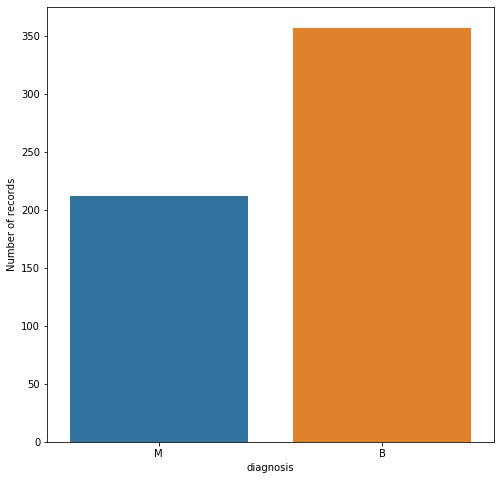

In [87]:
# Plot the count of classes
sns.countplot(df['diagnosis'])
plt.xlabel('diagnosis')
plt.ylabel('Number of records')
plt.show()

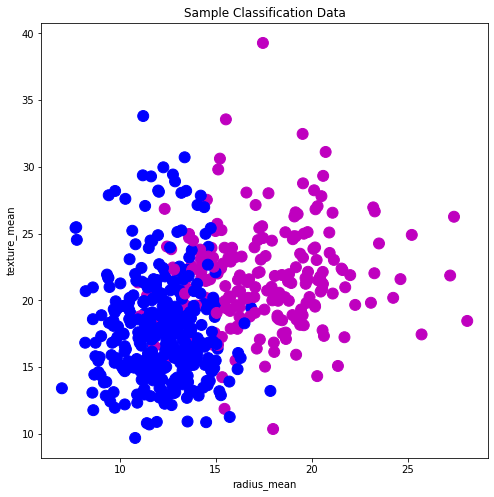

In [88]:
# Selecting two features from the data frame to show the linearity 
plt.scatter(df['radius_mean'], df['texture_mean'], s=120, c = df['diagnosis'])
plt.title("Sample Classification Data")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

### Preparing data for model setup
#### Feature and Target Data

In [89]:
# Selecting features and the target
X = df.iloc[:,2:]
y = df.iloc[:,1:2]

In [90]:
X # Features

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,cancavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [91]:
y # Target

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


### Split the data into train and test

In [92]:
# Splitting the data using train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#### Train data

In [93]:
X_train # Train features

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,cancavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
293,11.850,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,...,13.060,25.75,84.35,517.8,0.13690,0.17580,0.13160,0.09140,0.3101,0.07007
332,11.220,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.980,25.78,76.91,436.1,0.14240,0.09669,0.01335,0.02022,0.3292,0.06522
565,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
278,13.590,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,...,15.500,26.10,98.91,739.1,0.10500,0.07622,0.10600,0.05185,0.2335,0.06263
489,16.690,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,19.180,26.56,127.30,1084.0,0.10090,0.29200,0.24770,0.08737,0.4677,0.07623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.080200,0.058430,0.1550,0.04996,...,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.22100,0.12940,0.2567,0.05737
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.027100,0.014060,0.1506,0.06959,...,12.020,25.02,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.000000,0.000000,0.1653,0.06447,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559


In [94]:
X_train.shape # Train features shape

(426, 30)

In [95]:
y_train # Train target

,diagnosis
293,B
332,B
565,M
278,B
489,M
...,...
277,M
9,M
359,B
192,B


In [96]:
y_train.shape  # Train Target shape

(426, 1)

#### Test data

In [97]:
X_test # Test data features

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,cancavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,16.41,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,14.91,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710
298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,23.21,26.97,153.50,1670.0,0.09509,0.16820,0.19500,0.12370,0.1909,0.06309,...,31.01,34.51,206.00,2944.0,0.14810,0.41260,0.58200,0.25930,0.3103,0.08677
113,10.51,20.19,68.64,334.2,0.11220,0.13030,0.06476,0.03068,0.1922,0.07782,...,11.16,22.75,72.62,374.4,0.13000,0.20490,0.12950,0.06136,0.2383,0.09026
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,0.05808,...,13.61,19.27,87.22,564.9,0.12920,0.20740,0.17910,0.10700,0.3110,0.07592
76,13.53,10.94,87.91,559.2,0.12910,0.10470,0.06877,0.06556,0.2403,0.06641,...,14.08,12.49,91.36,605.5,0.14510,0.13790,0.08539,0.07407,0.2710,0.07191


In [98]:
X_test.shape # Test data features shape

(143, 30)

In [99]:
y_test # Test data target

,diagnosis
512,M
457,B
439,B
298,B
37,B
...,...
236,M
113,B
527,B
76,B


In [100]:
y_test.shape # Test data target shape

(143, 1)

### Methods

#### kNN Classifier

In [101]:
# Select the model and import from sklearn
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)  # Instantiate the model and set model parameters
clf.fit(X_train, y_train)  # Train the model
knn_pred = clf.predict(X_test) # Passing the test data to model for prediction

kNN_acc_test = clf.score(X_test, y_test)*100 # Evaluate the model
print("Test set accuracy: {:.2f}".format(kNN_acc_test ))

from sklearn.metrics import classification_report # Importing classification metrics 

print('kNN Classification Report')
print(classification_report(y_test,knn_pred)) # Printing kNN classification Report

Test set accuracy: 91.61
kNN Classification Report
              precision    recall  f1-score   support

           B       0.92      0.94      0.93        90
           M       0.90      0.87      0.88        53

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



#### Naive Bayes

In [67]:
# Implementing GaussianNB with Leave one out Cross validation

from sklearn.naive_bayes import GaussianNB # Select the model and import from sklearn
from sklearn.model_selection import LeaveOneOut # Importing Leave one out 
from sklearn.model_selection import cross_val_score # Importing Cross validation

gnb=GaussianNB()   # Instantiate the model and set model parameters
loo = LeaveOneOut() # Creating Leave one out object

gnb_scores=cross_val_score(gnb,X,y,cv=loo) # Building model with Gaussian Naive Bayes 
gnb_acc = gnb_scores.mean()*100

# Print number of iterations and accuracy of the model
print("Number of cv iterations: "+str(len(gnb_scores)))
print("Mean accuracy of the model: "+str(gnb_scores.mean()))

Number of cv iterations: 569
Mean accuracy of the model: 0.9384885764499121


#### Linear SVM

In [68]:
# Implementing Linear SVM with Leave one out Cross Validation

from sklearn.svm import SVC # "Support vector classifier"
from sklearn.model_selection import LeaveOneOut # Importing Leave one out 
from sklearn.model_selection import cross_val_score # Importing Cross validation

model = SVC(kernel='linear',C=1) # Instantiate the model and set model parameters
loo = LeaveOneOut() # Creating object of leave one out

model_scores=cross_val_score(model,X,y,cv=loo)
svm_acc = model_scores.mean()*100 # Calculating mean scores

# Print number of iterations and accuracy of the model
print("Number of cv iterations: "+str(len(model_scores))) 
print("Mean accuracy of the model: "+str(model_scores.mean()))

Number of cv iterations: 569
Mean accuracy of the model: 0.9543057996485061


#### Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression # Select the model and import from sklearn
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

logistic=LogisticRegression() # Instantiate the model and set model parameters
loo = LeaveOneOut() # Creating object of leave one out

LR_scores=cross_val_score(logistic,X,y,cv=loo)
LR_acc = LR_scores.mean()*100  # Calculating mean scores

# Print number of iterations and accuracy of the model
print("Number of cv iterations: "+str(len(LR_scores)))
print("Mean accuracy of the model: "+str(LR_scores.mean()))

Number of cv iterations: 569
Mean accuracy of the model: 0.9420035149384886


#### Decision Tree

In [102]:
from sklearn.tree import DecisionTreeClassifier # Select the model and import from sklearn
dtc = DecisionTreeClassifier(random_state=0).fit(X_train,y_train) # Instantiate the model and Train the model
DT_acc_test = dtc.score(X_test, y_test)*100 # Evaluate the model
print("Test set accuracy: {:.2f}".format(DT_acc_test))


Test set accuracy: 88.11


#### Gridsearch Cross Validation for high accuracy rate

In [103]:
# Create a hyper parameter grid to use in the GridSearch for a DecisionTreeclassifier:
param_grid={'max_depth':[2,3,4,10],
           'max_leaf_nodes':[6,10,20,30],
            'min_samples_split':[20,30,40,50]}

In [106]:
# Applying GridSearch on a DecisionTreeClassifier with a multiple parameter:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5,return_train_score=True)

grid_search.fit(X_train,y_train) # Train the model

dt_bp = grid_search.score(X_test, y_test)*100 # Evaluate the model

print("Test score is "+str(grid_search.score(X_test,y_test)*100))
print("Best parameters:"+str(grid_search.best_params_))


Test score is 93.00699300699301
Best parameters:{'max_depth': 3, 'max_leaf_nodes': 30, 'min_samples_split': 20}


In [109]:
# Create a hyper paramter grid to use in the GridSearch for a kNN classifier:
n_neighbors = list(range(1,15))
param_grid = dict(n_neighbors=n_neighbors)


In [110]:
# Applying GridSearch on a simpler kNN classifier with a single parameter:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_search_knn = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,return_train_score=True)

grid_search_knn.fit(X_train,y_train)  # Train the model

Knn_bp = grid_search_knn.score(X_test,y_test)*100 # Evaluate the model

print("Test score is "+str(grid_search_knn.score(X_test,y_test)*100))
print("Best parameters:"+str(grid_search_knn.best_params_))



Test score is 95.8041958041958
Best parameters:{'n_neighbors': 13}


In [111]:
# Creating accuracy list that consists of all models accuracy
accuracy = {'Model':['KNN,n=1','KNN,n=13','Naive Bayes','Linear SVM','Logistic Regression','Decision Tree','Decision tree with best parameters'],
            'Accuracy':[kNN_acc_test,Knn_bp,gnb_acc,svm_acc,LR_acc,DT_acc_test,dt_bp]}

In [112]:
# Converting accuracy list to data frame
accuracy_df = pd.DataFrame(accuracy)
accuracy_df.sort_values(by = 'Accuracy', ascending = False)

,Model,Accuracy
1,"KNN,n=13",95.804196
3,Linear SVM,95.430580
4,Logistic Regression,94.200351
2,Naive Bayes,93.848858
6,Decision tree with best parameters,93.006993
0,"KNN,n=1",91.608392
5,Decision Tree,88.111888


In [113]:
# Classification metrics for the high accuracy model: kNN,n=13
pred_knn = grid_search.predict(X_test)

from sklearn.metrics import classification_report

print('kNN Classification Report')
print(classification_report(y_test,pred_knn))

kNN Classification Report
              precision    recall  f1-score   support

           B       1.00      0.89      0.94        90
           M       0.84      1.00      0.91        53

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.94      0.93      0.93       143



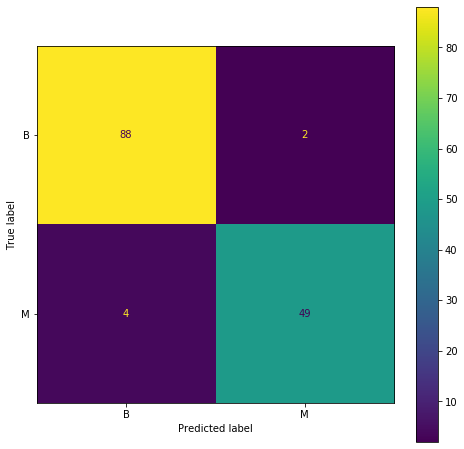

In [114]:
# Plotting the confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid_search_knn,X_test,y_test)
plt.show()

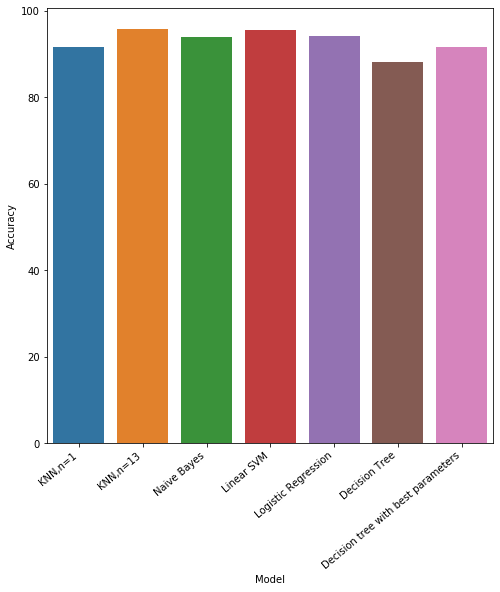

In [35]:
# Plotting the accuracies of all models
fig = sns.barplot(x = accuracy_df['Model'], y = accuracy_df['Accuracy'])
fig.set_xticklabels(fig.get_xticklabels(),rotation = 40,ha = "right")
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

### Conclusion
From the above results, I obtained highest accuracy of 95.804% for K nearest neighbours classifier for 13 neighbours after I used the parameters grid of neighbours ranging from 1 to 14 and grid search cross validation of 5 folds that returned 13 as the best for n_neighbours. I have obtained the accuracy for n_neighbours = 1 which is 91.61%. The second highest accuracy obtained by Linear SVM classifier using the leave one out cross validation is 95.43%. Though there are only 569 samples in the data, Linear SVM classifier has taken much time to run the chunk and obtain the testing accuracies. The accuracy for the decision trees classifier with best parameters; max_depth = 3, max_leaf_nodes = 30, min_samples_split = 20 is higher than the accuracy of decision trees with default parameters.